<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Intro to Classification and Model Tuning
### Logistic Regression - SVC - Baseline Accuracy - Hyperparameter Tuning

---

### Key Terms:
- Logistic Regression 
- Support Vector Machine
- Baseline Baseline Accuracy
- Model Hyperparameter

### Expected Knowledge:
- Manipulating data with Pandas


## Learning about two popular classification models

### Logistic Regression 

![Linear against log](./assets/Lin_vs_log.png)

[Logistic Regression](https://en.wikipedia.org/wiki/Logistic_regression)

It's a simple supervised model that works relatively well to classify data against our training set.
    
**Pros**:
    - Simple & works surprisingly well most of the time
    - Fast to train
    - Easy to interpret
    - Gives confidence value for its predictsions
    - Implicityly considers all linear combinations of features
    - It is scale agnostic (0 ->1 )
  
**Cons**:
    - Not Multilabel
    - Somewhat susceptible to outliers
    - Struggles with collinear features
    - It's... simple




## Expanding our understanding of Machine Learning by looking at multiple models together

As we get further into class we'll be exploring additional models. Most, if not all of them, follow the 4 steps of sklearn model building quite closely

>1. Import the model
>2. Instantiate a model object
>3. Fit it to data
>4. Make a prediction

There are a few nuances to tuning parameters and how a model is constructed but you should be able to begin independently exploring the documentation by this point as you look for options for your own capstone project. The first additional model we'll add is a Support Vector Machine or SVM. As we continue through class you'll be exposed to 20+ model types to give you a strong background is exploring the full world of machine learning after class.

The SVM was the original king of machine learning as it used an insightful trick to be able to quickly make predictions after a model was fit. While new models have arisen since it's hayday 10 years ago, it's still a powerful and effective model. Let's learn a little bit about it.

### Support Vector Machine Classifier


- [Support Vector Machine](https://en.wikipedia.org/wiki/Support_vector_machine)

**Background** The goal of a support vector machine is to find  the optimal separating hyperplane which maximizes the margin of the training data. 

**Pros**:
    - Powerful Model
    - Popularized modern machine learning due to it's extreme power (dethroned by Deep Learning)
    - Robust to outliers
    - Uses the kernel trick 
      
**Cons**:
    - Many possible settings
    - Slow to train
    - Scale matters
    - Can be a black box (it's hard to understand how or why it makes predictions)
    - Does not provide predicted probabilities
    
**What do we know?**

- It needs training data so it's a supervised model
- We're using it for classification

**What do we not know**
- How does it make predictions?
- What is a hyperplane?

Those questions are inherently linked. A **hyperplane** is the seperation of space between our classes. If we break it down further we can better understand it.

- in one dimension, an hyperplane is called a point
- in two dimensions, it is a line
- in three dimensions, it is a plane
- in more dimensions you can call it an hyperplane

As we start to understand that concept it begs another question. I can draw alot of lines so which is the right one? That's the goal of the SVM - **Finding the optimal hyperplane**. Finding this optimal hyperplane is dependent on a few particular vectors that support its placement - or support vectors.

Support Vectors are the data points closest to the hyperplane or decision line. These are the data points that are the **most difficult** to classify. Given their proximity to the hyperplane they have direct bearing on its optimum location. Essentially Support vectors would change the elements of the training set if moved or removed and are critical elements of the training set.

![image.png](./assets/SupportVector.png)


**Now to optimize our hyperlane!**

Step 1 - Seperate the plane as far as you can from data
![Optimal Hyperplane](./assets/optimal-hyperplane.png)

Step 2 - Find the hyperplane with the largest margin

For any hyperplane we can compute the margin.
 - Find the distance between the hyperplane and the closest data point. 
 - Take that distance and double it
 
Now you have the **margin**. Basically the margin is an area where you will not find any data points. (Note: this can cause some problems when data is noisy)

![Margin](./assets/margin.png)



### Kernel Trick: For when our data isn't already linearly separable

The below picture shows the true magic behind a Support Vector Machine. The objects on the left are mapped as we'd originally find them. A full seperation would require a curve and thus more complexity than drawing a line. In a support vector machine we rearrange using a set of mathmatical functions known as **kernels**. An intuitive way to think about kernels is a similarity function. Given two objects the kernel outputs some similarity score. The simpliest example is the linear kernel or dot-product. Given two vectors, the similarity is the lenght of hte projections of one vector to another. Given a data point to classify, the decision function makes use of the kernel by comparing that data point to a number of support vectors weighted by the learned parameters. The support vectors are in the domain of that data point and along the learned parameters are found by the learning algorithm. 

![Kernels](assets/Input_Feature.gif)

### Sometimes it's helpful to see this in 3d

While it's hard to draw a line to divide the classes in the picture on the left, it's easy on the right

![Kernels-2d-to-3d](./assets/2d-to-3d.png)

### Another example

<img src="./assets/2d-to-3d-projection.jpeg" width="600">

#### Parameters

>class sklearn.svm.SVC(C=1.0, kernel=’rbf’, degree=3, gamma=’auto’, coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=’ovr’, random_state=None)

Today we're going to adjust C. The C parameter trades off misclassification of training examples against simplicity of the decision surface. A low C makes the decision surface smooth, while a high C aims at classifying all training examples correctly
by giving the model freedom to select more samples as support vectors. 

![BigC_LittleC](assets/BigC_LittleC.png)

As we regularize, or penalize C, we can visualize the impact on our predictions
![Regularize](assets/c_regulation.png)

Note: 
* Here's a good source on [understanding the math](https://www.svm-tutorial.com/2014/11/svm-understanding-math-part-1/) or [The Idiot's Guide to SVM](http://web.mit.edu/6.034/wwwbob/svm-notes-long-08.pdf)
* Learn more about [Kernels](https://en.wikipedia.org/wiki/Kernel_method#Mathematics:_the_kernel_trick)

In [1]:
# Library Imports
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import missingno as msgn

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

plt.rcParams['figure.figsize'] = (10, 10)

# Lesson Structure:

In this lesson, you will build two types of classifiers

1. A [Logistic Regression Classifier](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
2. A [Suport Vector Machine Classifier](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

We will train these models on a dataset of tumors, aiming to classify a given tumor as benign or malignant. 

### Steps:
---
**1. EDA**
    - Analyze the dataset, mostly through visualizations.
**2. Data Preparation**
    - Handle non-numeric features.
    - Handle missing values.
    - Compute the baseline accuracy.
**3. Model Training**
    - Performing a train-test split on our data
    - Fitting the models of your choice (today: LogisticRegression and SVC) on the training data.
    - Scoring our trained models on the test data.
    
**4. Model Evaluation**
    - Gaining an understanding of how our model makes predictions.
    - Tuning our model to obtain better results.

![](http://www.biosytechworld.com/media/3188/123.jpg)

In [2]:
df = pd.read_csv('./datasets/cancer_uci.csv', index_col='Unnamed: 0')

df.head()

,Sample_code_number,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,Benign
1,1002945,5,4,4,5,7,10,3,2,1,Benign
2,1015425,3,1,1,1,2,2,3,1,1,Benign
3,1016277,6,8,8,1,3,4,3,7,1,Benign
4,1017023,4,1,1,3,2,1,3,1,1,Benign


# Part 1: EDA

Verifying Data Integrity

In [3]:
# Check the number of rows and columns of our dataset
df.shape

(699, 11)

In [4]:
# Check the data types and verify we have no missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample_code_number           699 non-null    int64 
 1   Clump_Thickness              699 non-null    int64 
 2   Uniformity_of_Cell_Size      699 non-null    int64 
 3   Uniformity_of_Cell_Shape     699 non-null    int64 
 4   Marginal_Adhesion            699 non-null    int64 
 5   Single_Epithelial_Cell_Size  699 non-null    int64 
 6   Bare_Nuclei                  699 non-null    object
 7   Bland_Chromatin              699 non-null    int64 
 8   Normal_Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    object
dtypes: int64(9), object(2)
memory usage: 65.5+ KB


In [5]:
# Confirming dtypes
df.dtypes

Sample_code_number              int64
Clump_Thickness                 int64
Uniformity_of_Cell_Size         int64
Uniformity_of_Cell_Shape        int64
Marginal_Adhesion               int64
Single_Epithelial_Cell_Size     int64
Bare_Nuclei                    object
Bland_Chromatin                 int64
Normal_Nucleoli                 int64
Mitoses                         int64
Class                          object
dtype: object

In [6]:
# For our non-numeric columns, explore how many (and what) categories we have
df['Bare_Nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [7]:
# Looking for pairwise correlations between the features (Heatmap)
df.corr()

,Sample_code_number,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bland_Chromatin,Normal_Nucleoli,Mitoses
Sample_code_number,1.000000,-0.055308,-0.041603,-0.041576,-0.064878,-0.045528,-0.060051,-0.052072,-0.034901
Clump_Thickness,-0.055308,1.000000,0.644913,0.654589,0.486356,0.521816,0.558428,0.535835,0.350034
Uniformity_of_Cell_Size,-0.041603,0.644913,1.000000,0.906882,0.705582,0.751799,0.755721,0.722865,0.458693
Uniformity_of_Cell_Shape,-0.041576,0.654589,0.906882,1.000000,0.683079,0.719668,0.735948,0.719446,0.438911
Marginal_Adhesion,-0.064878,0.486356,0.705582,0.683079,1.000000,0.599599,0.666715,0.603352,0.417633
Single_Epithelial_Cell_Size,-0.045528,0.521816,0.751799,0.719668,0.599599,1.000000,0.616102,0.628881,0.479101
Bland_Chromatin,-0.060051,0.558428,0.755721,0.735948,0.666715,0.616102,1.000000,0.665878,0.344169
Normal_Nucleoli,-0.052072,0.535835,0.722865,0.719446,0.603352,0.628881,0.665878,1.000000,0.428336
Mitoses,-0.034901,0.350034,0.458693,0.438911,0.417633,0.479101,0.344169,0.428336,1.000000


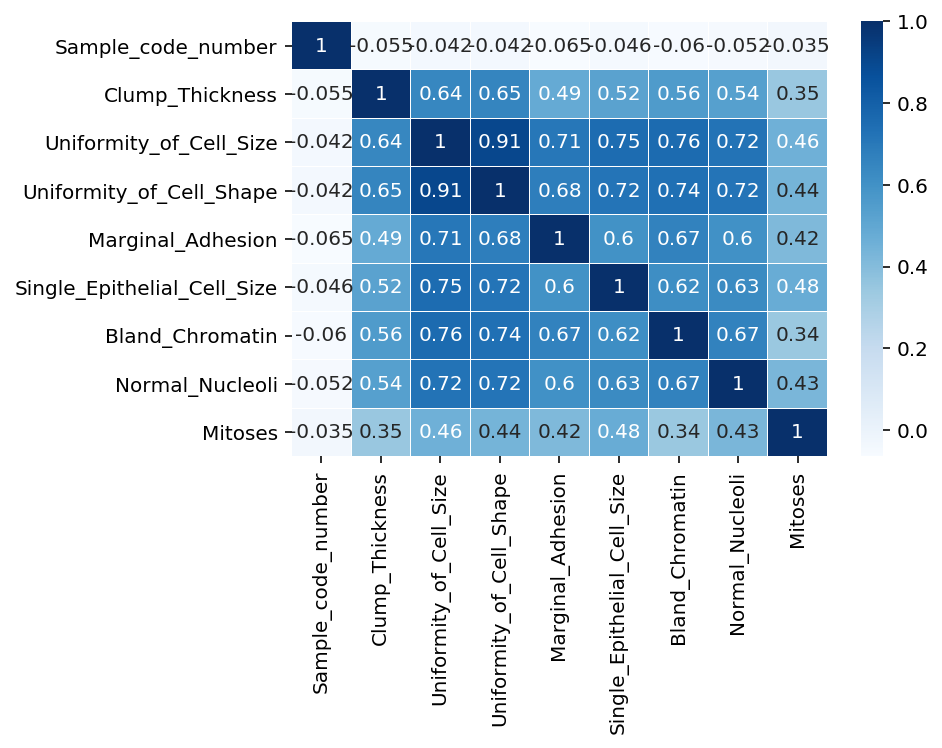

In [8]:
# NOTE: As a learning experience, run sns.pairplot on this data
# Also try: sns.pairplot(df, hue='Class', plot_kws={'alpha':0.1})
sns.heatmap(df.corr(),annot=True,linewidths=0.01, cmap='Blues');

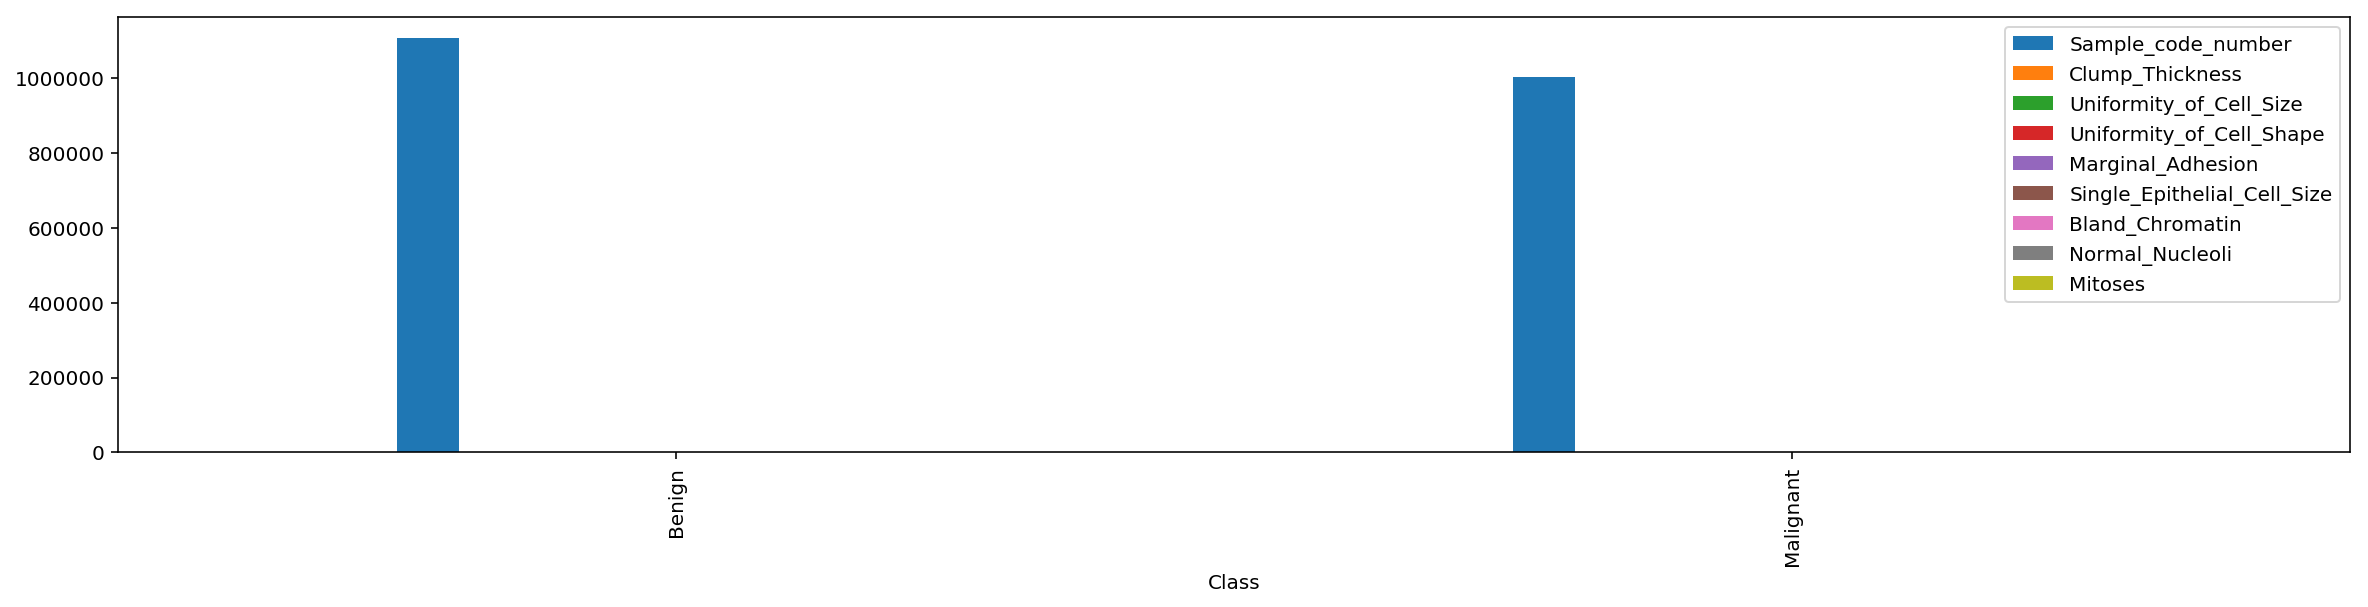

In [9]:
# Groupby is also a great EDA tool

df.groupby('Class').mean().plot(kind='bar', figsize=(20,4))

# Part 2: Preparing the data

In [10]:
# Drop columns you will not use
data = df.drop(['Sample_code_number'], axis=1)

In [11]:
# Handle 'bad data'
data['Bare_Nuclei'] = data['Bare_Nuclei'].apply(lambda x: np.nan if x =='?' else float(x))

### Find Missing Data

#### OPTIONAL: Installing a python library

To install `missingno` run `!pip install missingno` in a cell. You only ever need to do this once.

In [12]:
# uncomment the line below and execute the cell to install missingno
#!pip install missingno

#### Clean up missing data

In [13]:
# Discover bad data:
# Option 1: data.isna().sum()
# Option 2: data.isna().mean()

# Find rows with missing data
data.isna().sum()

# Uncomment the line below if you installed missingno
#msgn.matrix(data)

Clump_Thickness                 0
Uniformity_of_Cell_Size         0
Uniformity_of_Cell_Shape        0
Marginal_Adhesion               0
Single_Epithelial_Cell_Size     0
Bare_Nuclei                    16
Bland_Chromatin                 0
Normal_Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

In [14]:
# Drop rows with missing values

clean_data = data.dropna(how='any')

In [15]:
# optional: uncomment if missingno is installed
#msgn.matrix(clean_data)

In [16]:
# Separate features from target - set up X and y

X = clean_data.drop('Class', axis=1)
y = clean_data['Class']


#### Finding the baseline
For classification problems the baseline model is usually just guessing everything is the largest category. That means your baseline accuracy is determined by the percentage of results in the category with the largest number of entries.

In [17]:
# Find the baseline - i.e. largest category in our target
y.value_counts()

Benign       444
Malignant    239
Name: Class, dtype: int64

In [18]:
# Normalize it to get the fraction
y.value_counts(normalize=True)

Benign       0.650073
Malignant    0.349927
Name: Class, dtype: float64

# Part 3: Training a Model

In [19]:
# instantiate logistic regression
lr = LogisticRegression()


# instantiate Support Vector Classifier
svc = SVC()

In [20]:
# Train-test split w/ 80-20

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1987)

In [21]:
# fit logistic regression
lr.fit(X_train,y_train)

# score it
lr.score(X_test,y_test)


0.9416058394160584

In [22]:
# fit svc
svc.fit(X_train,y_train)

#score svc
svc.score(X_test,y_test)

0.948905109489051

# Part 4: Model Evaluation

We will discuss the evaluation of classification models in detail either at the end of this class or during the next lesson. For now, our main concern is accuracy.

In [23]:
# Reminding ourselves of the baseline we are trying to beat
y_test.value_counts(normalize=True)

Benign       0.656934
Malignant    0.343066
Name: Class, dtype: float64

In [24]:
# Looking at the model accuracy
lr.score(X_test, y_test)

0.9416058394160584

Our model is very accurate, but is it confident in its predictions? Could we trust it to automate the diagnosis of some patients?

In [25]:
y_proba = lr.predict_proba(X_test)

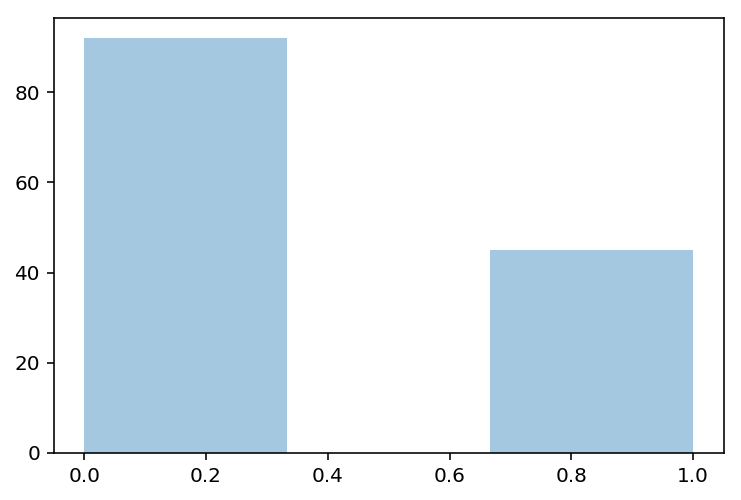

In [26]:
sns.distplot(y_proba[:,1], kde=False)

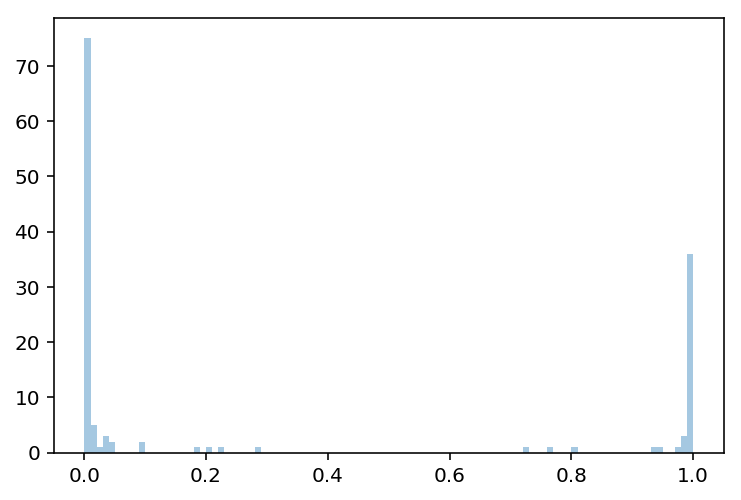

In [27]:
sns.distplot(y_proba[:,1], bins=100, kde=False);

In [28]:
# Ideally we'd also spend some time looking at the confusion matrix.

# Code Summary

In [29]:


# Reading the data
df = pd.read_csv('./datasets/cancer_uci.csv', index_col='Unnamed: 0')

# Dropping an unusable column
data = df.drop(['Sample_code_number'], axis=1)

# Identifying missing numbers
data['Bare_Nuclei'] = data['Bare_Nuclei'].apply(lambda x: np.nan if x =='?' else float(x))

# Dropping the few rows with missing numbers
clean_data = data.dropna(how='any')

# Separating the target from the features
y = clean_data['Class']
X = clean_data.drop('Class', axis=1)

# Computing the baseline
print('Baseline:', y.value_counts(normalize=True)[0].round(3))

# Instantiating a Logistic Regression Model
lr = LogisticRegression()

# Instantiating a Support Vector Machine Model
svc = SVC()

# Fitting the models
lr.fit(X_train, y_train)
svc.fit(X_train, y_train)

# Scoring the models:
print('Logistic Regression:', lr.score(X_test, y_test).round(3))
print('Support Vector Machine:', svc.score(X_test, y_test).round(3))

Baseline: 0.65
Logistic Regression: 0.942
Support Vector Machine: 0.949


# BONUS WORK 1

Try using other `kernels` and `C` values in the SVM model to obtain a higher accuracy on your test set.

# BONUS WORK 2


![](https://www.researchgate.net/profile/Juan_Banda/publication/256418526/figure/fig1/AS:297921313558528@1448041384565/Confusion-matrix-example.png)

# Confusion Matrix
This is a good (if difficult) way to look at your model and where it makes mistakes.

In [32]:
# Here I'm training a deliberately good and bad model

svc_awesome = SVC(kernel='rbf')
svc_good = SVC(kernel='rbf', C=0.01)
svc_bad = SVC(kernel='sigmoid')

svc_awesome.fit(X_train, y_train)
svc_good.fit(X_train, y_train)
svc_bad.fit(X_train, y_train)


awesome_score = svc_awesome.score(X_test, y_test)
good_score = svc_good.score(X_test, y_test)
bad_score = svc_bad.score(X_test, y_test)
print(f'Awesome Score: {awesome_score}')
print(f'Good Score: {good_score}')
print(f'Bad Score: {bad_score}')

Awesome Score: 0.948905109489051
Good Score: 0.9416058394160584
Bad Score: 0.4306569343065693


### Let's look at confusion matrices again

A confusion matrix allows you to visualize the performance of an algorithm on a test set of data vs known true values. There are a few methods 

| Metric  | Description  | Output  |
|-----|-----|-----|
|[confusion_matrix(y_true, y_pred)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix)| Compute confusion matrix to evaluate the accuracy of a classification | Grid |
|[multilabel_confusion_matrix(y_true, …)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.multilabel_confusion_matrix.html#sklearn.metrics.multilabel_confusion_matrix)| Compute a confusion matrix for each class or sample | Grid |
|[plot_confusion_matrix(estimator, X, …)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html#sklearn.metrics.plot_confusion_matrix)| Plot Confusion Matrix | Plot |
|[ConfusionMatrixDisplay(...)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay)| Confusion Matrix visualization| Plot |

In [33]:
# confusion matrix

y_pred_awesome = svc_awesome.predict(X_test)
confusion_matrix(y_test, y_pred_awesome)

array([[87,  3],
       [ 4, 43]])

![](https://www.researchgate.net/profile/Juan_Banda/publication/256418526/figure/fig1/AS:297921313558528@1448041384565/Confusion-matrix-example.png)

In [40]:
def make_confusion_matrix(y_true, X, model):
    classes = model.classes_
    confusion_matrix_values = confusion_matrix(y_true, model.predict(X), labels=classes)
    data_frame = pd.DataFrame(confusion_matrix_values, columns=classes, index=classes)
    return data_frame

In [44]:
# display the confusion matrix as a dataframe
print(f'rows = actual, cols = predicted')
make_confusion_matrix(y_test, X_test, svc_awesome)

rows = actual, cols = predicted


,Benign,Malignant
Benign,87,3
Malignant,4,43


## Or... my way

My motto is 

>**Data Scientists are curious but inherently lazy.**

If you find confusion matrices... well confusing then there's probably a better way. The number of TP/FP/TN/FN are important, but the ratios and metrics derived from them are more important. Let's resort to just using those

[Documentation in Sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)

In [45]:
# Using the classification_report package in sklearn.metrics gives the results we want.

print(classification_report(y_test, y_pred_awesome))

              precision    recall  f1-score   support

      Benign       0.96      0.97      0.96        90
   Malignant       0.93      0.91      0.92        47

    accuracy                           0.95       137
   macro avg       0.95      0.94      0.94       137
weighted avg       0.95      0.95      0.95       137



In [47]:
# What is the confusion matrix for the good model
make_confusion_matrix(y_test, X_test, svc_good)

,Benign,Malignant
Benign,87,3
Malignant,5,42


In [46]:
# What is the confusion matrix for the bad model
make_confusion_matrix(y_test, X_test, svc_bad)

,Benign,Malignant
Benign,59,31
Malignant,47,0


# Food for thought

In the case of a model that predicts if a tumor is benign or malignant, which of the following should you pay the most attention to?

1. True Positive Rate
2. True Negative Rate
3. False Positive Rate
4. False Negative Rate